In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

Data preparation

In [108]:
iris = pd.read_csv('IRIS.csv')

In [109]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [110]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [111]:
iris.shape

(150, 5)

In [112]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

Data cleaning

In [113]:
iris.isna()

,sepal_length,sepal_width,petal_length,petal_width,species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [114]:
iris.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [115]:
iris.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool

In [116]:
iris.duplicated().sum()

3

In [117]:
iris = iris.drop_duplicates()

In [118]:
iris.shape

(147, 5)

In [119]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


<Axes: >

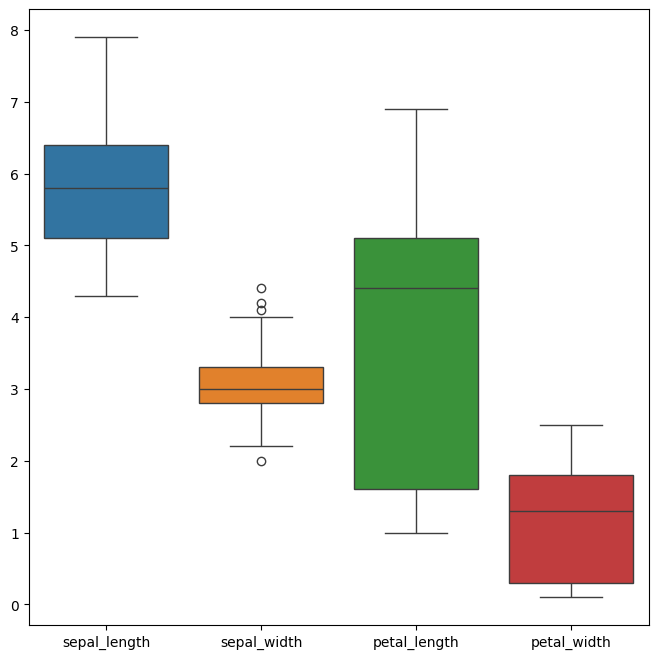

In [120]:
# outliers detection
_, ax = plt.subplots(figsize=(8, 8))

sns.boxplot(iris, ax = ax)

# outliers found in the dataset are not very significant.

Eploratory Data Analysis

In [121]:
# descriptive data analysis
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [122]:
iris['species'].value_counts()

species
Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: count, dtype: int64

In [123]:
iris.species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

C:\Users\USER\AppData\Local\Temp\ipykernel_12536\3662483518.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(iris, x = 'species', palette = 'Set1')


<Axes: xlabel='species', ylabel='count'>

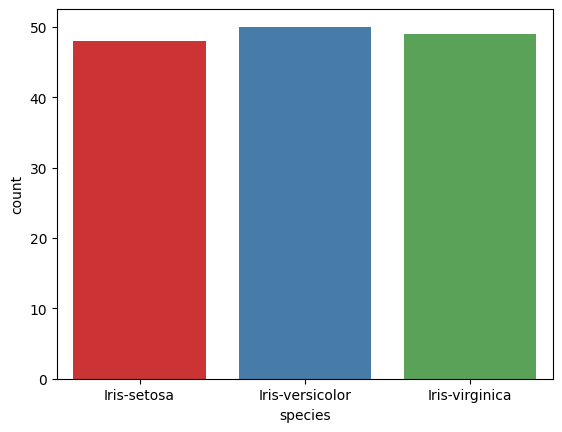

In [124]:
# plot of the species count
sns.countplot(iris, x = 'species', palette = 'Set1')

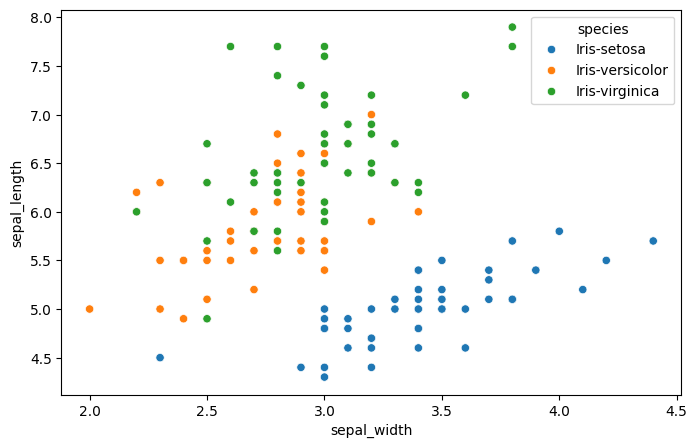

In [125]:
#Scatterplot for sepal length and sepal width by species
fig,ax=plt.subplots(figsize=(8,5))
sns.scatterplot(x="sepal_width",y="sepal_length",hue="species",data=iris)
plt.show()

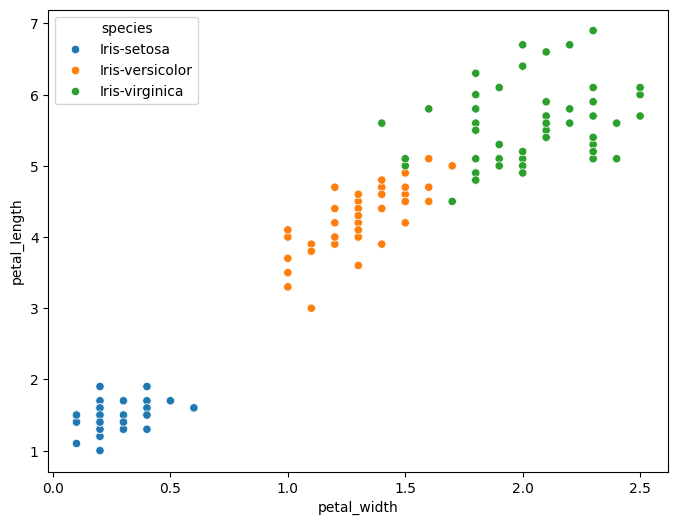

In [126]:
#Scatterplot for petal length and petal width by species
fig,ax=plt.subplots(figsize=(8,6))
sns.scatterplot(x="petal_width",y="petal_length",hue="species",data=iris)
plt.show()

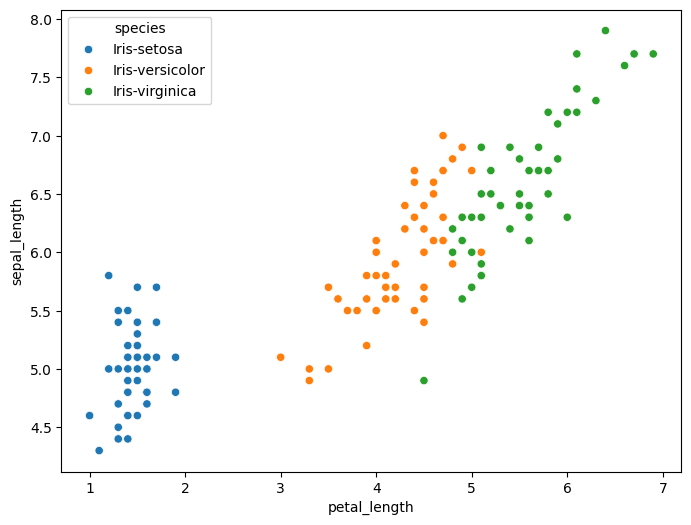

In [127]:
#Scatterplot for sepal length and petal length by species
fig,ax=plt.subplots(figsize=(8,6))
sns.scatterplot(x="petal_length",y="sepal_length",hue="species",data=iris)
plt.show()

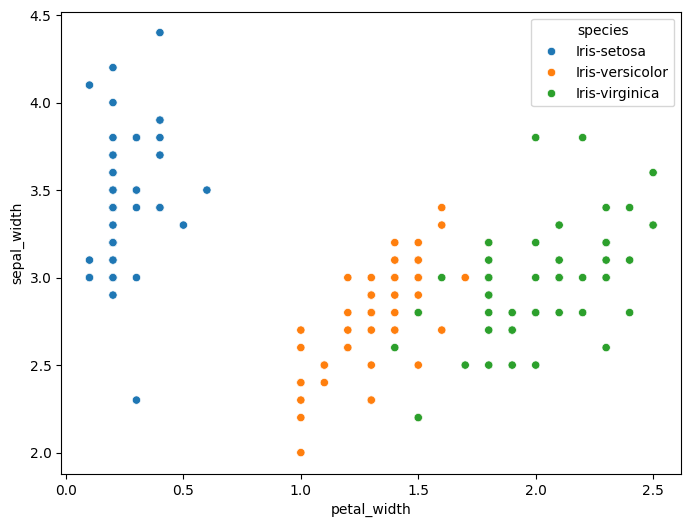

In [128]:
# Scatterplot for sepal width and petal width by species
fig,ax=plt.subplots(figsize=(8,6))
sns.scatterplot(x="petal_width",y="sepal_width",hue="species",data=iris)
plt.show()

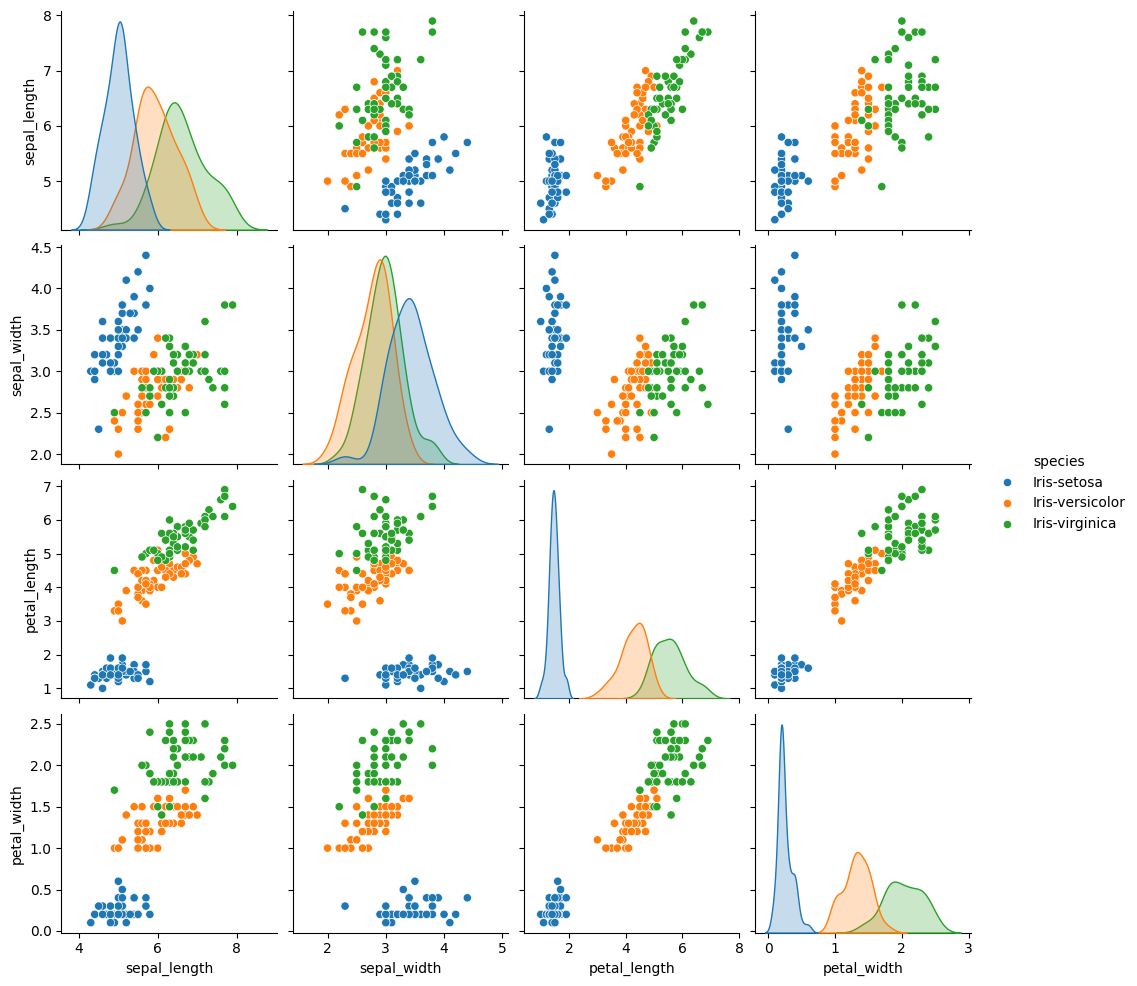

In [129]:
sns.pairplot(iris, hue='species') 

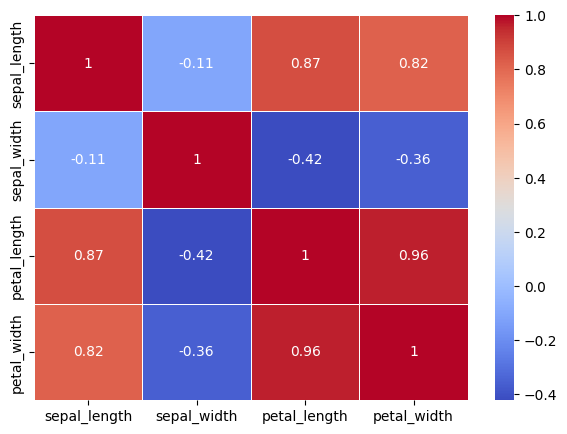

In [130]:
plt.figure(figsize = (7,5))
sns.heatmap(iris.drop(columns = 'species').corr(), annot = True, cmap = 'coolwarm', linewidth=0.5)
plt.show()

From the above heatmap, petal_length and petal_width has a very strong correlation(0.96). The sepal_length and petal_length has an 
equally strong correlation of 0.87.

Data splitting

In [131]:
X = iris.drop(columns= 'species')
y = iris['species']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Data splitting

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 42)

1) Logistic Regression

In [133]:
#training the model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [201]:
# making prdeictions
y_pred = model.predict(X_test)

# evaluating models performance
accuracy1 = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9666666666666667
Confusion Matrix:
 [[11  0  0]
 [ 0  9  1]
 [ 0  0  9]]
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



The overall accuracy of the model is 96.67%, meaning the model correctly predicted the species for 29 out of 30 test samples
The model achieved a high level of accuracy and performed excellently across the three species
The misclassification of Iris-versicolor as Iris-virginica is the only slight imperfection
The model still maintained a strong overall performance with a high f1-score and recall for all classes
The Iris-setosa species was perfectly classified, and both Iris-virginica and Iris-versicolor had a slight amount of misclassification.

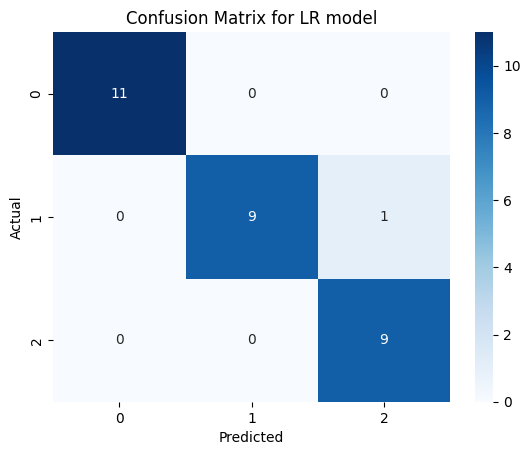

In [202]:
# plotting confusion matrix for better visualization

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues') #xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for LR model')
plt.show()

This matrix shows how well the model performed across the three classes (species)
Each row represents the actual species, and each column represents the predicted species

0 = Iris-setosa: All 11 Iris-setosa flowers were correctly predicted as setosa (no misclassifications).
1 = Iris-versicolor: Out of 10 Iris-versicolor flowers, 9 were predicted correctly, and 1 was misclassified as Iris-virginica.
2 = Iris-virginica: Out of 9 Iris-virginica flowers, 9 were predicted correctly (no misclassifications).

2) Random Forest classifier

In [203]:
from sklearn.ensemble import RandomForestClassifier

In [204]:
# Train a RandomForest model
RF_model = RandomForestClassifier()
RF_model.fit(X_train, y_train)

RandomForestClassifier()

In [205]:
#making predictions
RF_y_pred = RF_model.predict(X_test)


accuracy2 = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_score(y_test, RF_y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, RF_y_pred))
print("Classification Report:\n", classification_report(y_test, RF_y_pred))

Random Forest Accuracy: 0.9333333333333333
Confusion Matrix:
 [[11  0  0]
 [ 0  9  1]
 [ 0  1  8]]
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.89      0.89      0.89         9

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



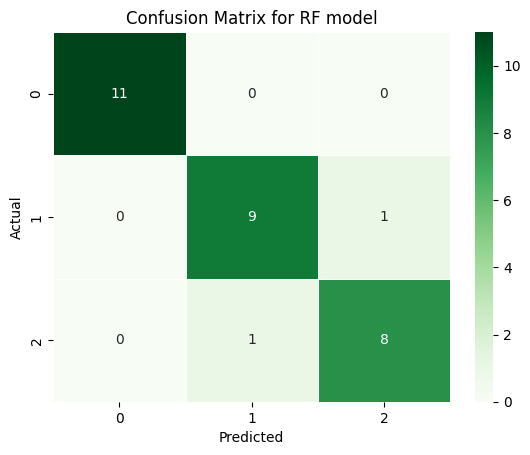

In [206]:
# confusion matrix plot

sns.heatmap(confusion_matrix(y_test, RF_y_pred), annot=True, fmt='d', cmap='Greens', linewidth = 0.5)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for RF model')
plt.show()

3) Support Vector Machine (SVM)

In [207]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [208]:
#Train a SVM model
svm_model = SVC()
svm_model.fit(X_train, y_train)

SVC()

In [250]:
# model predictions
svm_y_pred = svm_model.predict(X_test)

accuracy3 = accuracy_score(y_test, y_pred_rf)
print("Accuracy For SVM:", accuracy_score(y_test, svm_y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, svm_y_pred))
print("Classification Report:\n", classification_report(y_test, svm_y_pred))

Accuracy For SVM: 0.9333333333333333
Confusion Matrix:
 [[11  0  0]
 [ 0  9  1]
 [ 0  1  8]]
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.89      0.89      0.89         9

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



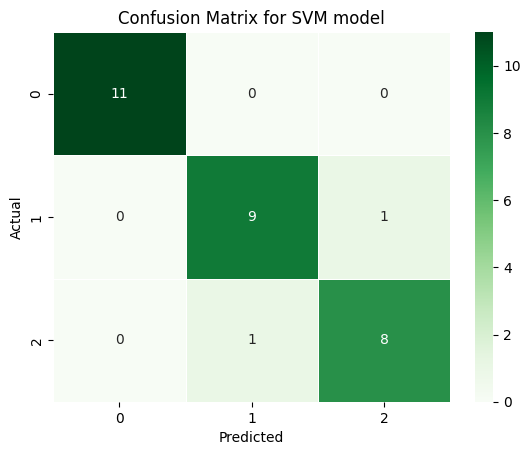

In [210]:
sns.heatmap(confusion_matrix(y_test, RF_y_pred), annot=True, fmt='d', cmap='Greens', linewidth = 0.5)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for SVM model')
plt.show()

4) K-Nearest Neighbors (KNN)

In [211]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [212]:
# Train a KNN model
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [213]:
# model preduction
y_pred_knn = model_knn.predict(X_test)
accuracy4 = accuracy_score(y_test, y_pred_rf)
print("Accuracy For KNN:", accuracy_score(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))

Accuracy For KNN: 0.9333333333333333
Confusion Matrix:
 [[11  0  0]
 [ 0  9  1]
 [ 0  1  8]]
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.89      0.89      0.89         9

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



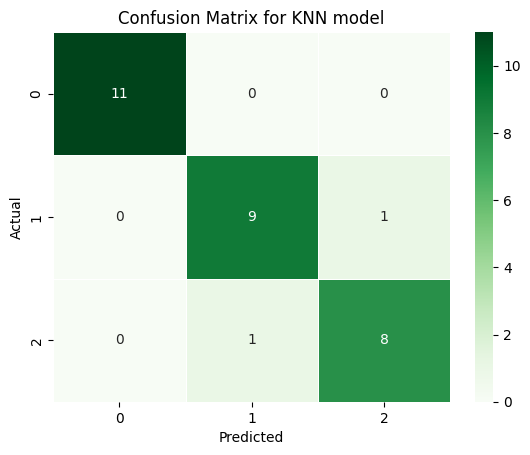

In [214]:
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='Greens', linewidth = 0.5)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for KNN model')
plt.show()

Comparison Barchart of the models accuracy

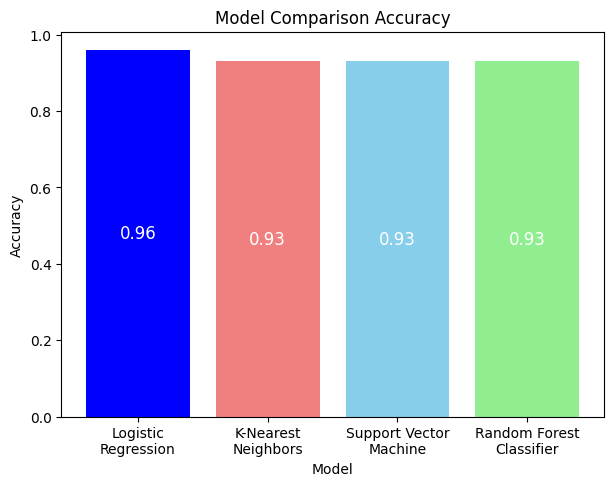

In [252]:

# Accuracy score for corresponding model
accuracy1 = 0.96  # Logistic Regression Accuracy
accuracy2 = 0.93  # K-Nearest Neighbors Accuracy
accuracy3 = 0.93  # Support Vector Machine Accuracy
accuracy4 = 0.93  # Random Forest Classifier Accuracy


model_names = ["Logistic\nRegression", "K-Nearest\nNeighbors", "Support Vector\nMachine", "Random Forest\nClassifier"]


model_scores = [accuracy1, accuracy2, accuracy3, accuracy4]

# Create the bar plot
fig, ax = plt.subplots(figsize=(7, 5))
bars = ax.bar(model_names, model_scores, color=['blue', 'lightcoral', 'skyblue', 'lightgreen'])  # Different colors for each model

# labels and title
ax.set_xlabel('Model')
ax.set_ylabel('Accuracy')
ax.set_title('Model Comparison Accuracy')

# Display the accuracy values in the middle of the bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    
    # Position the text in the middle of the bar 
    ax.text(bar.get_x() + bar.get_width() / 2, height / 2, f'{height:.2f}', ha='center', va='center', fontsize=12, color='white')


plt.show()


From the above chart, Logistic Regression has the highest accuracy score(0.96) as compared to the remaining models with 0.93.